## Ayuda -> Caso_Muerte_Coronaria_2023

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/datos_m_coronaria_2023/datos_train_test_sh.csv',delimiter=',',decimal='.')

In [3]:
datos.head(2)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,clase
0,0,154,4.50,4.75,23.52,Present,43,25.76,0.0,53,1
1,1,124,1.04,2.84,16.42,Present,46,20.17,0.0,61,0


In [4]:
datos.shape

(346, 11)

In [5]:
datos.clase.value_counts()

0    226
1    120
Name: clase, dtype: int64

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         346 non-null    int64  
 1   sbp        346 non-null    int64  
 2   tobacco    346 non-null    float64
 3   ldl        346 non-null    float64
 4   adiposity  346 non-null    float64
 5   famhist    346 non-null    object 
 6   typea      346 non-null    int64  
 7   obesity    346 non-null    float64
 8   alcohol    346 non-null    float64
 9   age        346 non-null    int64  
 10  clase      346 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 29.9+ KB


- Aplicamos One-Hot Encoding cuando:

    La característica categórica no es ordinal
    El número de características categóricas es menor, por lo que puede aplicarse eficazmente la codificación de una sola vez. Se puede usar pandas con pd.get_dummies o from sklearn.preprocessing import OneHotEncoder.

In [7]:
# Get list of categorical variables
s = (datos.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['famhist']


In [8]:
# Usando OneHotEncoder de sklearn
# Para pasar variables categóricas nominales a números
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['famhist'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['famhist_Absent','famhist_Present'])
df=pd.concat([datos,oh_df],axis=1)
df.head(5)

#Otra forma de hacer OneHotEncoder
# dummies = pd.get_dummies(datos[['famhist']])
# datos.drop(['famhist'],axis=1)
# df = pd.concat([datos, dummies],axis=1)
# df.head(2)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,clase,famhist_Absent,famhist_Present
0,0,154,4.50,4.75,23.52,Present,43,25.76,0.00,53,1,0.0,1.0
1,1,124,1.04,2.84,16.42,Present,46,20.17,0.00,61,0,0.0,1.0
2,2,148,12.20,3.79,34.15,Absent,57,26.38,14.40,57,1,1.0,0.0
3,3,110,4.64,4.55,30.46,Absent,48,30.90,15.22,46,0,1.0,0.0
4,4,164,0.50,6.95,39.64,Present,47,41.76,3.81,46,1,0.0,1.0


In [9]:
datos = df.reindex(columns=['sbp','tobacco','ldl','adiposity','typea','famhist_Absent','famhist_Present','obesity','alcohol','age','clase'])
datos.head(10)

,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age,clase
0,154,4.50,4.75,23.52,43,0.0,1.0,25.76,0.00,53,1
1,124,1.04,2.84,16.42,46,0.0,1.0,20.17,0.00,61,0
2,148,12.20,3.79,34.15,57,1.0,0.0,26.38,14.40,57,1
3,110,4.64,4.55,30.46,48,1.0,0.0,30.90,15.22,46,0
4,164,0.50,6.95,39.64,47,0.0,1.0,41.76,3.81,46,1
5,136,2.80,2.53,9.28,61,0.0,1.0,20.70,4.55,25,0
6,124,14.00,6.23,35.96,45,0.0,1.0,30.09,0.00,59,1
7,166,0.80,5.63,36.21,50,1.0,0.0,34.72,28.80,60,0
8,142,4.05,3.38,16.20,59,1.0,0.0,20.81,2.62,38,0
9,138,6.00,7.24,37.05,38,1.0,0.0,28.69,0.00,59,0


<ipython-input-10-f4334becaf4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sano_age, kde=False)
<ipython-input-10-f4334becaf4e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(enfermo_age, kde=False)


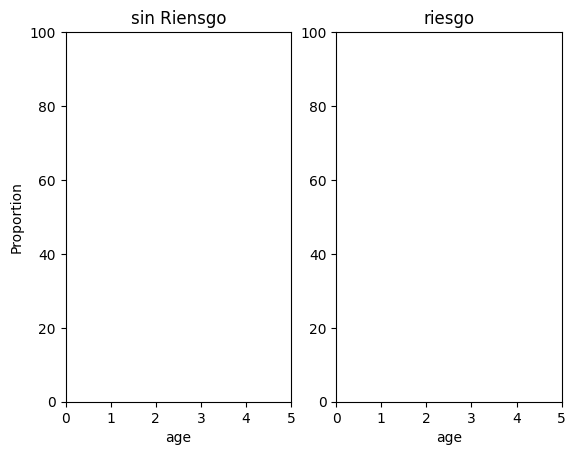

In [10]:
sano_age = datos[datos.clase == 0]["age"]
enfermo_age = datos[datos.clase == 1]["age"]
plt.subplot(1, 2, 1)
sns.distplot(sano_age, kde=False)
plt.axis([0, 5, 0, 100])
plt.title("sin Riensgo")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(enfermo_age, kde=False)
plt.axis([0, 5, 0, 100])
plt.title("riesgo")
plt.show()

<ipython-input-11-998433d26a52>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sinRiesgo)
<ipython-input-11-998433d26a52>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(riesgo)


<Axes: xlabel='adiposity', ylabel='Density'>

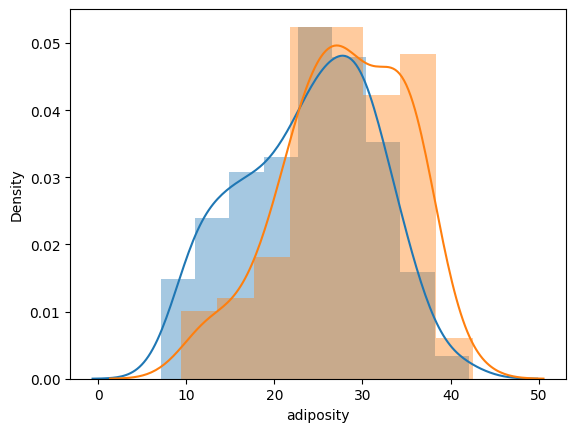

In [ ]:
sinRiesgo = datos[datos.clase == 0]["adiposity"]
riesgo = datos[datos.clase == 1]["adiposity"]
sns.distplot(sinRiesgo)
sns.distplot(riesgo)

In [ ]:
x=datos.iloc[:,0:10]
x.head(4)

,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age
0,154,4.50,4.75,23.52,43,0.0,1.0,25.76,0.00,53
1,124,1.04,2.84,16.42,46,0.0,1.0,20.17,0.00,61
2,148,12.20,3.79,34.15,57,1.0,0.0,26.38,14.40,57
3,110,4.64,4.55,30.46,48,1.0,0.0,30.90,15.22,46


In [ ]:
y=datos.iloc[:,10:11]
y.head(4)

,clase
0,1
1,0
2,1
3,0


In [ ]:
y.clase.value_counts()[1]/y.clase.count()

0.3468208092485549

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

0.65422247553909


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

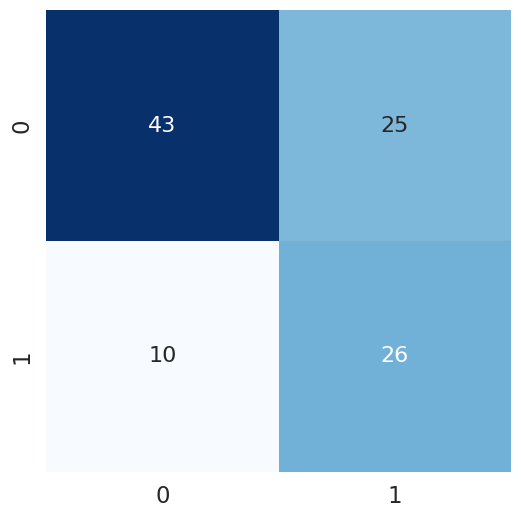

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix

#modelo_rf = RandomForestClassifier(random_state=0)
#modelo_rf.fit(x_train,y_train)
#predict = modelo_rf.predict(x_test)

modelo_lr = LogisticRegression(max_iter=200, class_weight={0: 0.2736180904522613, 1: 0.7263819095477386}, C= 10, penalty =  'l2')
modelo_lr.fit(x_train,y_train)
predict = modelo_lr.predict(x_test)
accuaracy = f1_score(y_test,predict,average="macro")

print(accuaracy)
con_mat = confusion_matrix(y_test, predict)
con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
#Ploting the confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.5) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.0,0.99,200)
parameters = {
    #'class_weight': [{0:x, 1:1.0-x} for x in weights],
    'penalty': ['l1', 'l2'],
    'C':[0.001,.009,0.01,.09,1,5,10,25],
    "max_iter":[100,200,300,400,1000000]
}
modelo_lg_cv=GridSearchCV(modelo_lr,parameters,cv=10,verbose=0,scoring="f1")
modelo_lg_cv.fit(x_train,y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [100, 200, 300, 400, 1000000],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

tunned params:  GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [100, 200, 300, 400, 1000000],
                         'penalty': ['l1', 'l2']},
             scoring='f1')
accuracy : 0.6421645292461683


<Axes: >

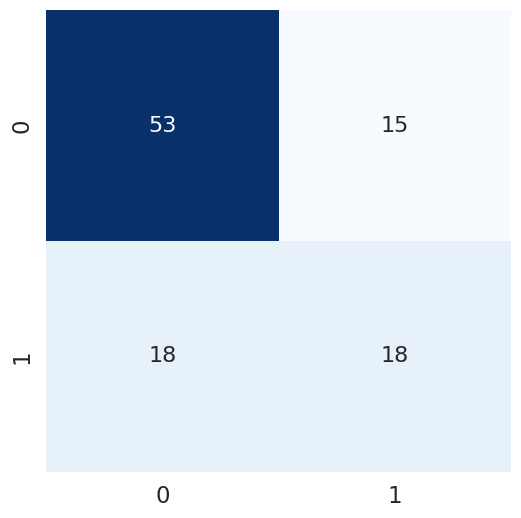

In [ ]:
predict = modelo_lg_cv.predict(x_test)
print("tunned params: ",modelo_lg_cv)
print("accuracy :",f1_score(y_test,predict,average="macro"))
con_mat = confusion_matrix(y_test, predict)
con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
#Ploting the confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.5) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [ ]:
modelo_lg_cv.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}

**Leer nuevas instancias a predecir**

In [ ]:
nuevas_instancias= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/datos_m_coronaria_2023/nuevas_instancias_a_predecir.csv',delimiter=';',decimal='.')

In [ ]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(nuevas_instancias['famhist'].values.reshape(-1, 1)).toarray()
oh_df1 = pd.DataFrame(oh_array,columns=['famhist_Absent','famhist_Present'])
df1=pd.concat([nuevas_instancias,oh_df1],axis=1)
df1.head(2)

#Otra forma de hacer OneHotEncoder
#dummies = pd.get_dummies(nuevas_instancias[['famhist']])
#nuevas_instancias.drop(['famhist'],axis=1)
#df1 = pd.concat([nuevas_instancias, dummies],axis=1)

nuevas_instancias = df1.reindex(columns=['sbp','tobacco','ldl','adiposity','typea','famhist_Absent','famhist_Present','obesity','alcohol','age'])

nuevas_instancias.head(2)

,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age
0,132,0.0,4.17,36.57,57,1.0,0.0,30.61,18.00,49
1,124,1.8,3.74,16.64,42,0.0,1.0,22.26,10.49,20


In [ ]:
prediccion_nuevos_individuos=modelo_lr.predict(nuevas_instancias)

In [ ]:
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [ ]:
datos_clasificados.index = datos_clasificados.index +1 

In [ ]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [ ]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [ ]:
datos_clasificados.head(2)

,Predicted
id,
1,0
2,0


In [ ]:
from google.colab import files

In [ ]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>